##### Final Exam


# Analysis of Carbon Emissions and Renewable Energies by Country




In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import scipy.stats
import json
import datetime
import numpy as np

The purpose of this analysis is to individually visualize and then make a combined analysis on two datasets: "List of countries by carbon dioxide emissions" and "List of countries by renewable energy production" both sourced from *Wikipedia.

Climate change and pollution are topics that have both been heavily prominent in current events. This analysis will first use the carbon dioxide emissions data to visualize the change at which carbon dioxide was emmitted in the years 1990, 2005, and 2017 by the most relevant countries in accordance with our second dataset. Then, a scatterplot will show carbon dioxide emissions per land area and per capita in 2017 for these relevant countries in both datasets.

Next, the analysis will move onto the renewable energies data. This data has been cleaned to show the 18 countries with full and accurate data from 2016 on renewable energies. First, the analysis will visualize two pie charts, of the highest carbon dioxide emitting country and lowest carbon dioxide emitting country from the first data set that is also represented in the second: China and Nicaragua, respectively. These pie charts will show the two countries' renewable energies percentage by type of renewable energy. In addition, there will be a bar chart comparing the percent of energy production that is created by renewable energies for the countries which are represented also in the carbon dioxide emissions dataset.

In conclusion, an statistical analysis will take place which will represent the hypothesis that with a higher percentage of renewable energies contributing to electrical production, there will be a lower carbon dioxide emission for a country.

*Sources: (https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions, https://en.wikipedia.org/wiki/List_of_countries_by_renewable_electricity_production)

## Webscraping CO2 Emissions Data




In [57]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions').text
soup = BeautifulSoup(url,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
rows = table.find_all('tr')
data = []
for row in rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns = ['Country', '1990', '2005', '2017', 'percentofworld_2017', 'percentchange_2017', 'perlandarea', 'percapita'])
df = df.dropna()
df = df.drop([3,4], axis = 0)

## CO2 Emissions Dataframe
This dataset did not need much cleaning and only the world emissions by consumption rows had to be removed. In addition, this data sets groups together all European Union nations as one row. The 8 variables in this dataset are:
- 'Country': Country/region name
- '1990': Carbon dioxide emissions for that Country in the year 1990
- '2005': Carbon dioxide emissions for that Country in the year 2005
- '2017': Carbon dioxide emissions for that Country in the year 2017
- 'percentofworld_2017': Percent of world-wide emissions by Country
- 'percentchange_2017': Percent change of carbon emissions per Country from the year 1990 to 2017
- 'perlandarea': The carbon dioxide emissions per Country per land area
- 'percapita': The carbon dioxide emissions per Country per capita

In [58]:
df.reset_index()
print(df)

            Country        1990        2005        2017 percentofworld_2017  \
2             World  22,674.116  30,049.809  37,077.404             100.00%   
5       Afghanistan       2.546       1.063      11.422               0.03%   
6           Albania       6.583       4.196       5.026               0.01%   
7           Algeria      65.677      98.197     159.929               0.43%   
8            Angola       5.851      15.975      30.876               0.08%   
..              ...         ...         ...         ...                 ...   
209         Vietnam      20.182      99.231     218.729               0.59%   
210  Western Sahara       0.144       0.227       0.276               0.00%   
211           Yemen       6.887      21.768      12.503               0.03%   
212          Zambia       2.955       2.457       4.967               0.01%   
213        Zimbabwe      17.178      11.388      12.087               0.03%   

    percentchange_2017 perlandarea percapita  
2   

## Webscraping Renewable Energies Data

In [59]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_renewable_electricity_production').text
soup = BeautifulSoup(url,'xml')

table = soup.find('table',{'class':'wikitable sortable mw-datatable'})
rows = table.find_all('tr')
data = []
for row in rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df2 = pd.DataFrame(data, columns = ['Country', 'year', 'totalelectric', 'totalrenew', 'renewtotal',
                                    'hydroGWh', 'hydro%total', 'hydro%re',
                                   'windGWh', 'wind%total', 'wind%re',
                                   'bioGWh', 'bio%total', 'bio%re',
                                   'solarGWh', 'solar%total', 'solar%re',
                                   'geoGWh', 'geo%total', 'geo%re', 'ref'])
#This is me cleaning the data frame... there was maybe a more elegant way to do so but because there is 21 columns
#and each were randomly blank strings or 'None', I had to improvise
df2 = df2[df2['Country'].astype(bool)]
df2 = df2[df2['year'].astype(bool)]
df2 = df2[df2['totalelectric'].astype(bool)]
df2 = df2[df2['totalrenew'].astype(bool)]
df2 = df2[df2['renewtotal'].astype(bool)]
df2 = df2[df2['hydroGWh'].astype(bool)]
df2 = df2[df2['windGWh'].astype(bool)]
df2 = df2[df2['bioGWh'].astype(bool)]
df2 = df2[df2['solarGWh'].astype(bool)]
df2 = df2[df2['geoGWh'].astype(bool)]

## Renewable Energies Dataframe
This dataset required much cleaning as some countries' columns were simply empty. The cell above shows how I cleaned this dataset from over 200 observations to 16. The 21 variables in this dataset are:
- 'Country': Country/region name
- 'year': Year in which these observations took place
- 'totalelectric': Total electric production per Country
- 'totalrenew': Total renewable energy produced per Country
- 'renewtotal': Percent of total electric production that is contributed by renewable energy
- 'hydroGWh': Total electric produced through hydropower
- 'hydro%total': Percent of total energy hydropower contributed to
- 'hydro%re: Percent of renewable energy hydropower contributed to
- 'windGWh': Total electric produced through windpower
- 'wind%total': Percent of total energy windpower contributed to
- 'wind%re: Percent of renewable energy windpower contributed to
- 'bioGWh': Total electric produced through biopower
- 'bio%total': Percent of total energy biopower contributed to
- 'bio%re: Percent of renewable energy biopower contributed to
- 'solarGWh': Total electric produced through solarpower
- 'solar%total': Percent of total energy solarpower contributed to
- 'solar%re: Percent of renewable energy solarpower contributed to
- 'geoGWh': Total electric produced through geothermal power
- 'geo%total': Percent of total energy geothermal power contributed to
- 'geo%re: Percent of renewable energy geothermal power contributed to
- 'ref': referance codes for Wikipedia

In [60]:
df2.reset_index()
print(df2)

           Country  year totalelectric totalrenew renewtotal   hydroGWh  \
40           China  2019     7,142,200  1,739,400     24.35%  1,153,400   
46      Costa Rica  2016        10,881     10,630      97.7%      8,026   
71          France  2016       556,184     97,242      17.5%     64,889   
82       Guatemala  2016        12,450      6,435      51.7%      3,951   
91       Indonesia  2016       248,613     39,509      15.9%     19,410   
96           Italy  2016       289,768    108,036      37.3%     44,257   
98           Japan  2016     1,057,976    158,822      15.0%     85,083   
101          Kenya  2016         9,752      8,843      90.7%      3,798   
127         Mexico  2016       320,353     48,937      15.3%     30,698   
140    New Zealand  2016        43,033     36,118      83.9%     25,730   
141      Nicaragua  2016         4,590      2,445      53.3%      426.7   
154    Philippines  2016        90,797     22,031      24.3%       8833   
156       Portugal  2016 

This dataframe below subsets the emissions dataframe by the renewables dataframe countries, and vice versa.

In [61]:
df3 = df[df['Country'].isin(df2["Country"])]
df3.reset_index()
print(df3)
df4 = df2[df2['Country'].isin(df["Country"])]
df4.reset_index()
print('_____________________________________________________________________________________________________________________')
print(df4)

           Country       1990       2005        2017 percentofworld_2017  \
44           China  2,397.048  6,263.064  10,877.218              29.34%   
49      Costa Rica      2.913      6.306       8.138               0.02%   
86       Guatemala      3.874     11.674      17.760               0.05%   
96       Indonesia    162.000    359.989     511.327               1.38%   
104          Japan  1,149.400  1,276.863   1,320.776               3.56%   
107          Kenya      6.467      8.787      18.594               0.05%   
129         Mexico    290.355    448.171     507.183               1.37%   
139    New Zealand     24.006     36.746      36.795               0.10%   
140      Nicaragua      1.945      4.312       5.919               0.02%   
153    Philippines     43.623     81.261     137.154               0.37%   
155       Portugal     43.672     68.077      56.771               0.15%   
159        Romania    187.142    104.713      81.131               0.22%   
160         

### CO2 Emissions Graphs

#### Carbon emissions by country from 1990 to 2017
    This graph shows the main players in carbon emissions in comparison to all other countries that are in both of the 
    datasets, and how their emissions have changed over time. This graph shows China with a huge increase in emissions over time and the United States and Russia with slightly decreasing emissions, the rest of the countries on a steady but very slow rise.

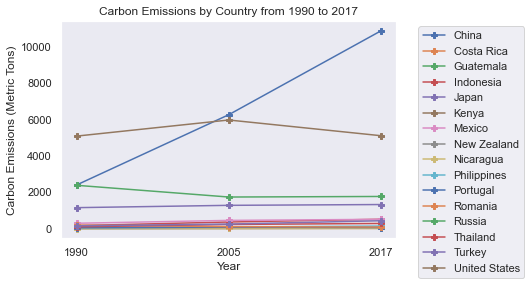

In [62]:
df_year = df3[['Country','1990', '2005', '2017']]
df_year = df_year.melt(id_vars=["Country"], 
        var_name="Date", 
        value_name="Value")
df_year = df_year.stack().str.replace(',','').unstack()
df_year['Value'] = pd.to_numeric(df_year['Value'],errors='coerce')
df_year = df_year.pivot_table('Value',index = "Date", columns = "Country", aggfunc = 'sum')
plt.plot(df_year, marker = 'P')
plt.legend(df_year, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Metric Tons)")
plt.title("Carbon Emissions by Country from 1990 to 2017")
plt.show()

#### 2017 Carbon Dioxide Emissions Per Capita & Per Land Area
    This plot is a seaborn scatterplot that lists every country in both datasets and their CO2 emissions per capita
    in comparison to their CO2 emissions per land area. There seems to show in this graph a very interesting trend 
    that for some countries, as CO2 emissions per land area rises, so do those per capita. However, there are a ton of 
    outliers that show that some countries, such as Japan, have no correlation between the two variables. This plot
    also shows where the United States and other larger countries stand in comparison to less populated countries such as
    Nicaragua or Kenya.

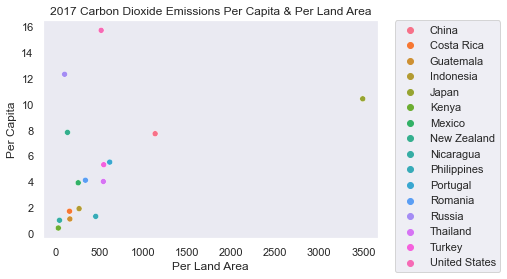

In [63]:
sns.set_theme(style="dark")


df_scatt = df3.stack().str.replace(',','').unstack()
df_scatt['percapita'] = pd.to_numeric(df_scatt['percapita'],errors='coerce')
df_scatt['perlandarea'] = pd.to_numeric(df_scatt['perlandarea'],errors='coerce')

g = sns.scatterplot(
    data=df_scatt,
    x= df_scatt.perlandarea, y=df_scatt.percapita, hue = 'Country')

g.set(xlabel = 'Per Land Area', 
      ylabel = 'Per Capita', title = '2017 Carbon Dioxide Emissions Per Capita & Per Land Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Renewable Energies Graphs

#### Renewable Energies by Type of Renewable Energy: China and Nicaragua
    This chart shows some very interesting comparisons. China clearly uses no geothermal energy at all whereas nearly 30% of Nicaragua's renewable energies are produced through geothermal energy. In addition, China uses majority hydropower for
    their renewables.

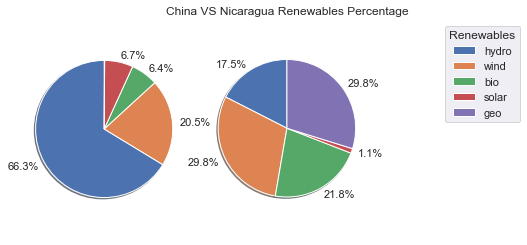

In [64]:
df_china = pd.DataFrame(df4.loc[40])
df_nic = pd.DataFrame(df4.loc[141])
df_china = df_china.transpose()
df_nic = df_nic.transpose()

df_china = df_china[['hydro%re','wind%re','bio%re', 'solar%re', 'geo%re']]
df_china = df_china.stack().str.replace('%','').unstack()
df_nic = df_nic[['hydro%re','wind%re','bio%re', 'solar%re', 'geo%re']]
df_nic = df_nic.stack().str.replace('%','').unstack()
df_china = df_china.astype('float')/100
df_china = [0.663, 0.205, 0.064, 0.067, 0]
df_nic = df_nic.astype('float')/100
df_nic = [0.175, 0.298, 0.218, 0.011, 0.298]

fig1, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(df_china,
        shadow=True, startangle=90, labels = ('66.3%', '20.5%', '6.4%', '6.7%', ''), normalize = False)
ax1.axis('equal')


ax2.pie(df_nic,
        shadow=True, startangle=90, labels = ('17.5%', '29.8%', '21.8%', '1.1%', '29.8%'), normalize = False)
ax2.axis('equal')


plt.legend(title = 'Renewables', labels = ('hydro', 'wind', 'bio', 'solar', 'geo'), 
           bbox_to_anchor=(1.50, 1), loc='upper left', ncol=1)
plt.title('China VS Nicaragua Renewables Percentage')
plt.show()

#### Percent of Energy from Renewables
     This chart is a great showcase of which countries of interest (those that are in both datasets) use renewable energy 
     and what percent of their total energy is contributed by renewables. Costa Rica, Kenya, and New Zealand are the top 
     three in renewable energies percentage, whereas two of the top carbon emitters, China and United States, fall short.

AxesSubplot(0.125,0.125;0.775x0.755)


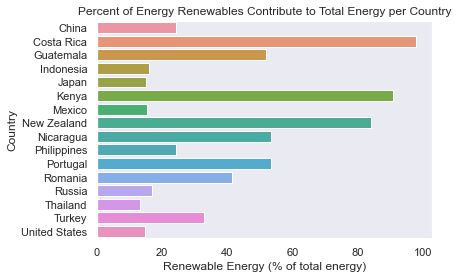

In [65]:
df_renew = df4[['Country', 'renewtotal']]
df_renew  = df_renew.stack().str.replace('%','').unstack()
df_renew['renewtotal']  =  df_renew['renewtotal'].astype('float')

a = sns.barplot(x = 'renewtotal', y = 'Country', data = df_renew)
a.set_title('Percent of Energy Renewables Contribute to Total Energy per Country')
a.set_xlabel('Renewable Energy (% of total energy)')
print(a)

### Statistical Analysis
    In this statistical analysis I will be testing to see if the variables from countries in both datasets '2017' and 'renewtotal' have a linear relationship. '2017' is a variable from the first dataset that represents countries' carbon dioxide emissions in 2017. 'renewtotal' is a variable from the second dataset that represents the percent of total energy 
    production that is contributed by renewables in 2016. In the beginning of this analysis, the hypothesis was formed that
    countries with a higher percentage of renewables in 2016 would have less carbon emissions in 2017. The null hypothesis, therefore, would be that countries with a higher percentage of renewables have no relationship with lower carbon 
    emissions. The following tests seek to reject this null hypothesis.

In [66]:
percentlist = df_renew['renewtotal'].tolist()
df_analy = df3[['Country', '2017']]
df_analy  = df_analy.stack().str.replace(',','').unstack()
df_analy['2017']  =  df_analy['2017'].astype('float')
for i in range(0,16):
    percentlist[i] = percentlist[i]/100
df_analy['renewperc'] = percentlist
df_analySTATS = df_analy.describe()
df_analySTATS
print(df_analySTATS)
regress = scipy.stats.linregress(x = df_analy['2017'], y = df_analy['renewperc'])
print('_________________________________________________________________________________________')
corr = scipy.stats.pearsonr(x = df_analy['renewperc'], y = df_analy['2017'])
print(corr)
print('_________________________________________________________________________________________')
regress = scipy.stats.linregress(x = df_analy['2017'], y = df_analy['renewperc'])
print(regress)

               2017  renewperc
count     16.000000  16.000000
mean    1322.492750   0.402906
std     2852.913084   0.289582
min        5.919000   0.131000
25%       32.244750   0.157500
50%      208.225000   0.286250
75%      713.689250   0.533500
max    10877.218000   0.977000
_________________________________________________________________________________________
(-0.33307457591556733, 0.20745301970425847)
_________________________________________________________________________________________
LinregressResult(slope=-3.3808392476356325e-05, intercept=0.4476176039391358, rvalue=-0.33307457591556733, pvalue=0.20745301970425864, stderr=2.557907761046469e-05, intercept_stderr=0.07833801040572394)


The statistics above represent three things: descriptive statistics, a correlation test, and a linear regression. The descriptive statistics show the mean, standard deviation, and intervals of the datasets. The correlation test is a Pearson's correlation test to attain a linear relationship between the variables. This test returns a coefficient and a p-value, which shows us that while there seems to be a negative correlation between the two variables, the p-value is far out of the confidence interval of .05 and therefore the relationship is not significant. Seeing this, I decided to then test a linear regression on the dataset, but again found that even though there was a negative slope, the p-value was exactly the same as before and therefore I could not reject my null hypothesis.

### Conclusion

    This analysis was very interesting as it showed what countries are main players in polluting and using renewables on our planet. There were a few heavy outliers, such as the European Union being grouped into one country and China's observation in the second dataset being made in 2019 that I think affected my statistical tests. I would like to retest this in the future using perhaps a more recent and well-maintained dataset. In addition, I would like to use the vastness of the second dataset more. There were so many interesting variables that I would like to compare, such as population size or geography to what renewable energies a country used. As a huge proponent for renewable energy I think doing an ANOVA or chi-squared test on an additional categorical dataset in relation to the second dataset may also be really interesting.